In [1]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


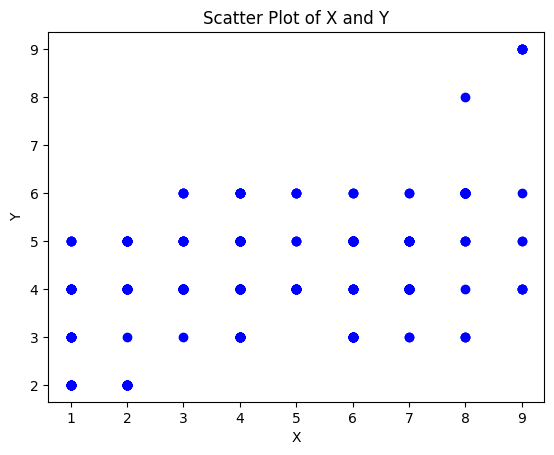

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca data dari file CSV
df = pd.read_csv('dataset/datasetedit.csv')

# Membuat scatter plot
plt.scatter(df['X'], df['Y'], c='blue', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Scatter Plot of X and Y')
plt.xlabel('X')
plt.ylabel('Y')

# Menampilkan grid
# plt.grid(True)

# Menampilkan plot
plt.show()